# The Eye - SOM Quality Prediction CNN

This notebook allows you to test "The Eye" CNN model for predicting Self-Organizing Map (SOM) quality.

**The Eye** is a CNN trained to predict SOM quality by analyzing RGB composite visualizations:
- **Red Channel**: U-Matrix (cluster boundaries)
- **Green Channel**: Distance Map (quantization error)
- **Blue Channel**: Dead Neurons Map

## Quick Start
1. Upload your trained model (.keras file)
2. Upload RGB SOM maps or test set CSV
3. Run evaluation cells
4. Download predictions

## 1. Setup Environment

In [1]:
import os
import sys
import platform
from pathlib import Path

import numpy as np
import tensorflow as tf
import keras

# 1. Identifikace Rootu a Cest
project_root = Path(os.getcwd()).resolve()
model_path = project_root / "som_quality.keras"

print(f"{' PROJECT STATUS ':=^80}")
print(f"Root:      {project_root}")
print(f"OS:        {platform.system()} {platform.release()} ({platform.machine()})")
print(f"Python:    {sys.version.split()[0]} ({sys.executable})")

# 2. Verze klíčových knihoven
print(f"\n{' LIBRARIES ':-^80}")
print(f"TensorFlow: {tf.__version__}")
print(f"Keras:      {keras.__version__}")
print(f"NumPy:      {np.__version__}")

# 3. Hardware / Accel
gpus = tf.config.list_physical_devices('GPU')
gpu_status = f"ACTIVE ({gpus[0].name})" if gpus else "INACTIVE (CPU only)"
print(f"Metal GPU:  {gpu_status}")

# 4. Diagnostika problému s načítáním
print(f"\n{' MODEL DIAGNOSTICS ':-^80}")
print(f"Cesta k modelu: {model_path}")
print(f"Soubor existuje: {model_path.exists()}")
if model_path.exists():
    print(f"Velikost:        {model_path.stat().st_size / (1024*1024):.2f} MB")

# Detekce potenciálního konfliktu Keras 2 vs 3
is_keras_3 = hasattr(keras, "ops")
print(f"Keras engine:    {'Keras 3 (Modern)' if is_keras_3 else 'Keras 2 (Legacy)'}")
print(f"{'':=^80}")

================================ PROJECT STATUS ================================
Root:      /Users/tomas/OSU/Python/NexusSom/tests/Jupyter
OS:        Darwin 25.0.0 (arm64)
Python:    3.11.14 (/Users/tomas/OSU/Python/NexusSom/.venv/bin/python)

---------------------------------- LIBRARIES -----------------------------------
TensorFlow: 2.18.0
Keras:      3.13.0
NumPy:      1.26.4
Metal GPU:  ACTIVE (/physical_device:GPU:0)

------------------------------ MODEL DIAGNOSTICS -------------------------------
Cesta k modelu: /Users/tomas/OSU/Python/NexusSom/tests/Jupyter/som_quality.keras
Soubor existuje: True
Velikost:        14.76 MB
Keras engine:    Keras 3 (Modern)


/Users/tomas/OSU/Python/NexusSom/.venv/lib/python3.11/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


## 2. Upload Model

Upload your trained `.keras` model file.

In [2]:
from pathlib import Path
import keras

# Použití Pathlib pro robustnost
model_path = Path("./som_quality.keras").resolve()

if not model_path.exists():
    raise FileNotFoundError(f"Model nebyl nalezen na adrese: {model_path}")

try:
    # V Kerasu 3 je .keras nativní a doporučený formát
    model = keras.models.load_model(model_path)
    print(f"✓ Model '{model_path.name}' úspěšně načten.")
except ValueError as e:
    # Specifická chyba pro Keras 3 (např. custom layers)
    print(f"⚠ Chyba při načítání (pravděpodobně custom objects): {e}")
    # Zde bys definoval custom_objects={'TvojeVrstva': TvojeVrstva}
except Exception as e:
    print(f"✗ Kritická chyba: {e}")

model.summary()

2026-01-14 11:36:48.453768: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2026-01-14 11:36:48.453985: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2026-01-14 11:36:48.453994: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
I0000 00:00:1768387008.454662 1534014 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1768387008.455107 1534014 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


✓ Model 'som_quality.keras' úspěšně načten.


Model: "SOM_Quality_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_1 (Conv2D)                │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1_1 (BatchNormalization)      │ (None, 224, 224, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1_1 (Activation)            │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1_2 (BatchNormalization)      │ (None, 224, 224, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1_2 (Activation)            │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_1 (Conv2D)                │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2_1 (BatchNormalization)      │ (None, 112, 112, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2_1 (Activation)            │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_2 (Conv2D)                │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2_2 (BatchNormalization)      │ (None, 112, 112, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2_2 (Activation)            │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_1 (Conv2D)                │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3_1 (BatchNormalization)      │ (None, 56, 56, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3_1 (Activation)            │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_2 (Conv2D)                │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3_2 (BatchNormalization)      │ (None, 56, 56, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3_2 (Activation)            │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout3 (Dropout)              │ (None, 28, 28, 128)    │             

 Total params: 3,823,973 (14.59 MB)

 Trainable params: 1,273,761 (4.86 MB)

 Non-trainable params: 2,688 (10.50 KB)

 Optimizer params: 2,547,524 (9.72 MB)

## 3. Helper Functions

In [3]:
import numpy as np
import tensorflow as tf
import keras
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

def load_and_preprocess_image(filepath, image_size=(224, 224)):
    if not Path(filepath).exists():
        raise FileNotFoundError(f"Soubor neexistuje: {filepath}")

    img = Image.open(filepath).convert('RGB')
    # Změna na BILINEAR: Standard pro většinu CNN (MobileNet, ResNet atd.)
    img = img.resize(image_size, Image.BILINEAR)

    # Rychlá konverze a normalizace
    img_array = np.array(img, dtype=np.float32) / 255.0
    return img_array

def predict_single_image(model, image_path, threshold=0.5):
    img = load_and_preprocess_image(image_path)

    # Model očekává 4D tensor (batch, h, w, c)
    img_batch = img[np.newaxis, ...]

    # Inference na GPU
    prediction = model.predict(img_batch, verbose=0)[0][0]

    # Logika labelu a konfidence
    is_good = prediction >= threshold
    return {
        'quality_score': float(prediction),
        'quality_label': "GOOD" if is_good else "BAD",
        'confidence': float(prediction if is_good else (1.0 - prediction))
    }

### Test The Good, The Bad

✓ bad.png: BAD (score: 0.0045)
✓ good.png: GOOD (score: 0.9926)


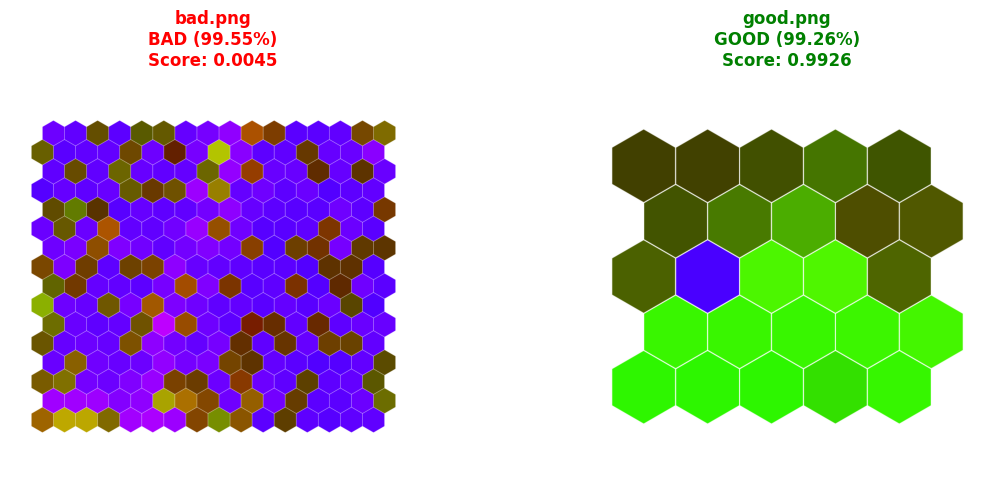

In [6]:
test_files = ["bad.png", "good.png"]

plt.figure(figsize=(12, 5))


for i, filename in enumerate(test_files):
    try:
        f_path = project_root / filename
        res = predict_single_image(model, f_path)

        # Vizualizace
        plt.subplot(1, 2, i + 1)
        plt.imshow(Image.open(f_path))
        plt.axis('off')

        color = 'green' if res['quality_label'] == 'GOOD' else 'red'
        title = f"{filename}\n{res['quality_label']} ({res['confidence']:.2%})\nScore: {res['quality_score']:.4f}"
        plt.title(title, fontsize=12, weight='bold', color=color)

        print(f"✓ {filename}: {res['quality_label']} (score: {res['quality_score']:.4f})")

    except Exception as e:
        print(f"✗ Chyba u souboru {filename}: {str(e)}")

plt.tight_layout()
plt.show()